# <center>Crisp Methodlogy</center>


<img src="crisp.png" width="400">

***

# <center>1.Business Understanding</center>

***

### Predict how susceptible Online Social Network (OSN) users are to social engineering attack using Machine learning algorithm SVM

***

# <center>2.Data Understanding</center>

***

In [1]:
# Import the libraries

import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
# Load the dataframe

df = pd.read_csv('train.csv')
df.head()

,name,tweet
0,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,scotthamilton,is upset that he can't update his Facebook by ...
2,mattycus,@Kenichan I dived many times for the ball. Man...
3,ElleCTF,my whole body feels itchy and like its on fire
4,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
# Shape of the original data

print("Shape of original dataset",df.shape)

Shape of original dataset (1600000, 2)


# <center>3.Data Preparation</center>

### Features use


* Mail address
* date of birth / age
* Bank details
* Phone number
* Address

## Preprocessing the data

### HTML decoding

In [4]:
print(df.tweet[279])

Whinging. My client&amp;boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&amp;reviewed correctly. 


In [5]:
from bs4 import BeautifulSoup
example1 = BeautifulSoup(df.tweet[279], 'lxml')
print (example1.get_text())

Whinging. My client&boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&reviewed correctly. 


### Remove @mention

In [6]:
print(df.tweet[343])

@TheLeagueSF Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down 


In [7]:
print(re.sub(r'@[A-Za-z0-9]+','',df.tweet[343]))

 Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down 


### Remove non-ASCII character

In [8]:
print(df.tweet[226])

Tuesdayï¿½ll start with reflection ï¿½n then a lecture in Stress reducing techniques. That sure might become very useful for us accompaniers 


In [9]:
print(''.join([i if ord(i) < 128 else ' ' for i in df.tweet[226]]))

Tuesday   ll start with reflection    n then a lecture in Stress reducing techniques. That sure might become very useful for us accompaniers 


### Remove Hashtag

In [10]:
print(df['tweet'][175])

@machineplay I'm so sorry you're having to go through this. Again.  #therapyfail


In [11]:
print(re.sub(r'(\s)#\w+', r'\1', df['tweet'][175]))

@machineplay I'm so sorry you're having to go through this. Again.  


## Process on all tweet

In [12]:
from nltk.tokenize import WordPunctTokenizer
from bs4 import BeautifulSoup

# start the wordtokenizer instance
tok = WordPunctTokenizer()

In [13]:
#at_rate = r'@[a-z0-9_]+'

# regex for extracting @tag
at_rate = r'(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9-_]+)'

# regex for extract url link
url_link = r'https?://[A-Za-z0-9./]+'

# regex for hashtag
hashtag = r'(\s)#\w+'

# Combine both regex
combine = r'|'.join((at_rate, url_link))

def preprosessing(text):
    
    # parse text in lxml format
    soup = BeautifulSoup(text, 'lxml')
    
     # extract the text
    new_text = soup.get_text()
    
    # subtract the @tag and url link
    strip_text = re.sub(combine, '', new_text)
    
    
    # remove hashtag
    strip_text = re.sub(hashtag, r'', strip_text)
    
    
    try:
        # remove all non-ascii character 
        clean = ''.join([i if ord(i) < 128 else ' ' for i in strip_text])
        
    except:
        clean = strip_text
        
    # convert all text to lower case
    lower_case = clean.lower()
    
    # remove all special characters
    lower_case = re.sub(r'[()\"#/;:<>{}`+=~|!?,]', '', lower_case)
    
    
    # tokenize and join together to remove unneccessary white spaces
    words = lower_case.split()
    
    # remove unnecessay white spaces,
    return (" ".join(words)).strip()

## Process all tweets

In [14]:
# Make another column for processed tweet

df['processed_tweet'] = df['tweet'].apply(preprosessing)

In [15]:
df.to_csv('train_processed.csv',index=False)

In [16]:
# Make 2 new columns

df['is_Threat_user'] = 0
df['subject'] = None

#### 1.Email

In [17]:
count = 0
for row_no,tweet in enumerate(df['processed_tweet']):
    
    # regex for extracting email feature
    if re.findall("[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+",tweet):
        
        #print(row_no,tweet)
        
        # change is_Threat_user column value to 1
        df.loc[row_no, 'is_Threat_user'] = 1
        
        # change subject to email so that we can identified the feature for "is_Threat_user" column 
        df.loc[row_no, 'subject'] = "Email"
        
        # count the total email features
        count += 1
print("Total Email features extracted : ", count)  

Total Email features extracted :  576


#### 2.Age / Birth date

In [18]:
count = 0
for row_no,tweet in enumerate(df['processed_tweet']):
    
    # regex for extracting age or birthdate feature
    if (re.findall("(?:date of birth|my dob |b - day|my age |years old)",tweet)):
        
        #print(row_no,tweet)
        
        # change is_Threat_user column value to 1
        df.loc[row_no, 'is_Threat_user'] = 1
        
         # change subject to age so that we can identified the feature for "is_Threat_user" column 
        df.loc[row_no, 'subject'] = "Age"
        
        # count the total age features
        count += 1
        
print("Total age features extracted : ", count) 

Total age features extracted :  495


#### 3. Bank Account no 

In [19]:
count = 0
for row_no,tweet in enumerate(df['processed_tweet']):
    
    # regex for extracting bank details feature
    if (re.findall("(?:my debit card|my credit card|my account no|my account number|my bank)",tweet)):
        
        # print(row_no,tweet)
        
        # change is_Threat_user column value to 1
        df.loc[row_no, 'is_Threat_user'] = 1
        
        # change subject to Bank details so that we can identified the feature for "is_Threat_user" column 
        df.loc[row_no, 'subject'] = "Bank"
        
        # count the total bank details features
        count += 1
        
print("Total bank details features extracted : ", count)  

Total bank details features extracted :  290


#### 4.phone number

In [20]:
count = 0
for row_no,tweet in enumerate(df['processed_tweet']):
    
    # regex for extracting phone number features
    if (re.findall("[a-z. ]+ \+?1?\s*\(?-*\.*(\d{3})\)?\.*-*\s*(\d{3})\.*-*\s*(\d{4})$",tweet)):
        
        #print(row_no,tweet)
        
        # change is_Threat_user column value to 1
        df.loc[row_no, 'is_Threat_user'] = 1
        
        # change subject to Phone so that we can identified the feature for "is_Threat_user" column 
        df.loc[row_no, 'subject'] = "Phone"
        
        # count the total phone details features
        count += 1
        
print("Total Phone number features extracted : ", count)  

Total Phone number features extracted :  156


#### 5.Address

In [21]:
count = 0
for row_no,tweet in enumerate(df['processed_tweet']):
    
    # regex for extracting address details feature
    if (re.findall("(?:my location|my current location|my home address|my house address|i live in)",tweet)):
        
        #print(row_no,tweet)
        
        # change is_Threat_user column value to 1
        df.loc[row_no, 'is_Threat_user'] = 1
        
        # change subject to Adress details so that we can identified the feature for "is_Threat_user" column 
        df.loc[row_no, 'subject'] = "Address"
        
         # count the total Address details features
        count += 1
        
print("Total Address details features extracted : ", count) 

Total Address details features extracted :  911


In [22]:
# checking shape of all vulnerable user's tweet 

print("Shape of total vulnerable people's tweet :",df[df["is_Threat_user"]==1].shape)

Shape of total vulnerable people's tweet : (2426, 5)


In [23]:
# see the dataframe
df.head()

,name,tweet,processed_tweet,is_Threat_user,subject
0,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",- awww that's a bummer. you shoulda got david ...,0,None
1,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his facebook by ...,0,None
2,mattycus,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball. managed to sa...,0,None
3,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,0,None
4,Karoli,"@nationwideclass no, it's not behaving at all....",no it's not behaving at all. i'm mad. why am i...,0,None


### Taking Samples

In [24]:
# Taking 2500 samples from normal people tweet
df_0 = df[df['is_Threat_user']==0].sample(n=2500)

# Taking all samples from vulnerable people tweet
df_1 = df[df['is_Threat_user']==1].sample(n=2426)

In [25]:
# merge the two dataframe
frames = [df_0, df_1]

# concat the dataframe to result 
result = pd.concat(frames)

In [26]:
result.head()

,name,tweet,processed_tweet,is_Threat_user,subject
1587589,Your_Cup_Cake,yes it is,yes it is,0,None
1470993,magicoilyoctopi,@gottalooksharp IT IS!,it is,0,None
642110,shaypee,"Shoot, here I thought we were gonna have a lon...",shoot here i thought we were gonna have a long...,0,None
589728,CHWong,@KateEdwards Why are you green... it's scaring...,why are you green... it's scaring me.,0,None
1471868,dancesjt,Is looking for a job. I hope i get one soon co...,is looking for a job. i hope i get one soon co...,0,None


In [27]:
# randomly suffle all data by taking all sample at random
result = result.sample(frac=1)

In [28]:
from sklearn.model_selection import train_test_split

# split the datset into two set, training set and 8 percentage testing set
train_df, test_df = train_test_split(result, test_size=0.08)

In [29]:
print("Shape of training phase data : ",train_df.shape)
print("Shape of testing phase data : ",test_df.shape)

Shape of training phase data :  (4531, 5)
Shape of testing phase data :  (395, 5)


In [30]:
train_df.head()

,name,tweet,processed_tweet,is_Threat_user,subject
1116993,meganlikeshats,:: in the car on the way home. text! 6156183900,in the car on the way home. text 6156183900,1,Phone
1082863,RayOnativia,@shelliwazzu thanks. I try!,thanks. i try,0,None
72030,tomrowan,Heading off to Londonderry - on my Bank Holida...,heading off to londonderry - on my bank holida...,1,Bank
1039221,andyrobb,Tesla Model S in the Palo Alto showroom - sweet,tesla model s in the palo alto showroom - sweet,0,None
1295146,mintypop,"just came back watching &quot;17 again&quot;, ...",just came back watching 17 again it was pretty...,0,None


In [31]:
# Changing dataframe index to user name
test_df.index = test_df.name

In [32]:
test_df.head()

,name,tweet,processed_tweet,is_Threat_user,subject
name,,,,,
oldskool90,oldskool90,DAMMIT. DAMMIT. DAMMIT. *Bangs head on desk*,dammit. dammit. dammit. *bangs head on desk*,0,None
HayleyNqahuia,HayleyNqahuia,@jane__ irl just ended lo. but it was good,irl just ended lo. but it was good,0,None
truecarvalue,truecarvalue,Good night for now. Keep sending your requests...,good night for now. keep sending your requests...,1,Email
fitprosarah,fitprosarah,"@kravmascara Thanks, Sarah! When's your's? @s...",thanks sarah when's your's has a bday this mon...,0,None
FRECKLEFACEVICK,FRECKLEFACEVICK,@thecampingforum good morning,good morning,0,None


# Modeling

In [33]:
from sklearn.model_selection import train_test_split

# Again split the training set to training set (80%) and validation set (20%)

# X_train ->  features of training set
# y_train ->  label of training set

# X_test ->  features of validation set
# y_test ->  label of validation set

X_train, X_test, y_train, y_test = train_test_split(train_df['processed_tweet'], train_df['is_Threat_user'], test_size=0.20, random_state=42)

In [34]:
print("Training set shape : ",X_train.shape)
print("Validation set shape : ",X_test.shape)

Training set shape :  (3624,)
Validation set shape :  (907,)


In [35]:
from sklearn.feature_extraction.text import CountVectorizer

# start the instance of CountVectrizer which convert word to vector
count_vect = CountVectorizer()

In [36]:
# converting all words in training dataset to vector form

X_train_counts = count_vect.fit_transform(X_train)

print("Shape of input features in training data : ",X_train_counts.shape)

Shape of input features in training data :  (3624, 7807)


In [37]:
from sklearn.feature_extraction.text import TfidfTransformer

# start the instance of TfidfTransformer which get word occurance frequency in each documents
tfidf_transformer = TfidfTransformer()

# Transform all the documents to Inverse Document Frequency matrix representation  
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

print("Shape of input feature matrix in training data : ",X_train_tfidf.shape)


Shape of input feature matrix in training data :  (3624, 7807)


### Building the SVM model

### Apply the model

In [38]:
# Building the pipeline
from sklearn.pipeline import Pipeline

# import the classifier
from sklearn.linear_model import SGDClassifier

# make the svm classifier with pipeline
# make (1,2) n-gram word vectorizer
# make tfidf transformer to false
# alpha = learning rate


svm_clf = Pipeline([('vect', CountVectorizer( ngram_range=(1, 2))),
                      ('tfidf', TfidfTransformer( use_idf=False)),
                      ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-4, max_iter=10, random_state=42))])

In [39]:
# Fit the data in classifier
_ = svm_clf.fit(X_train, y_train)

# predict the validation set
predicted_svm = svm_clf.predict(X_test)

# print accuracy
print("Accuracy on svm classifier : ",np.mean(predicted_svm == y_test))

Accuracy on svm classifier :  0.958103638368


#### Finding optimum Parameters using gridsearch method

In [40]:
from sklearn.model_selection import GridSearchCV

# Range of parameters to given fo the classifier
parameters_svm = {'vect__ngram_range': [(1, 1), (1, 2)],'tfidf__use_idf': (True, False),'clf-svm__alpha': (1e-2, 1e-3)}

# define the model
grid_svm = GridSearchCV(svm_clf, parameters_svm, n_jobs=-1)

In [41]:
# fit the model
_ = grid_svm.fit(X_train, y_train)

print("Accuracy : ")
print(grid_svm.best_score_)

print("Optimum Parameters :")
print(grid_svm.best_params_)

Accuracy : 
0.951710816777
Optimum Parameters :
{'clf-svm__alpha': 0.001, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}


## Confusion Matrix

Confusion matrix, without normalization
[[428  11]
 [ 27 441]]
Normalized confusion matrix
[[ 0.97  0.03]
 [ 0.06  0.94]]


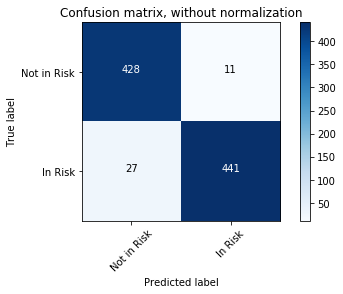

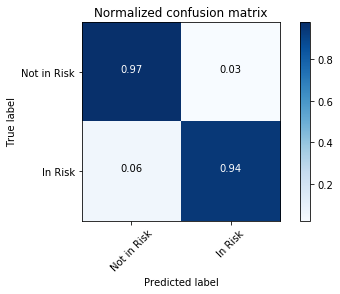

In [42]:
from sklearn.metrics import confusion_matrix

import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predicted_svm)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
class_names = ["Not in Risk","In Risk"]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Evaluation on test data

In [43]:
test_tweet = test_df.processed_tweet.tolist()
print("Total test data :",len(test_tweet))

Total test data : 395


In [44]:
test_df.head(200)

,name,tweet,processed_tweet,is_Threat_user,subject
name,,,,,
oldskool90,oldskool90,DAMMIT. DAMMIT. DAMMIT. *Bangs head on desk*,dammit. dammit. dammit. *bangs head on desk*,0,None
HayleyNqahuia,HayleyNqahuia,@jane__ irl just ended lo. but it was good,irl just ended lo. but it was good,0,None
truecarvalue,truecarvalue,Good night for now. Keep sending your requests...,good night for now. keep sending your requests...,1,Email
fitprosarah,fitprosarah,"@kravmascara Thanks, Sarah! When's your's? @s...",thanks sarah when's your's has a bday this mon...,0,None
FRECKLEFACEVICK,FRECKLEFACEVICK,@thecampingforum good morning,good morning,0,None
starrynite01,starrynite01,@JennyFOD Yay that makes me so happy! Have fun...,yay that makes me so happy have fun say hi to ...,0,None
dogzero,dogzero,"@_ohsobangin Hi Amethyst, @Banksyart is now at...",@_ohsobangin hi amethyst is now at - he's been...,0,None
TiffKittie,TiffKittie,Back from my Columbia River Gorge trip with St...,back from my columbia river gorge trip with st...,0,None
priscx,priscx,@chermayneugenia wow he let u cut his hair. he...,wow he let u cut his hair. hehe...that's nice ...,0,None


### Predict on new data

In [45]:
# convert word to vector
X_new_counts = count_vect.transform(test_tweet)

# convert word count frequncy matrix
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

# predict for the test data
predicted =svm_clf.predict(test_tweet)

# make a column for predicted value
test_df['predicted'] = predicted

# list of original label 
test_y = test_df['is_Threat_user'].tolist()

/home/aurobindo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [46]:
# Accuracy on test set

print("Accuracy on test set : ",np.mean(predicted == test_y))

Accuracy on test set :  0.969620253165


## Misclassified tweet

In [47]:
print("Total misclassified tweet :",test_df[test_df['is_Threat_user'] != test_df['predicted']].shape)

Total misclassified tweet : (12, 6)


In [48]:
mis_df = test_df[test_df['is_Threat_user'] != test_df['predicted']]

#### misclassified invulnerable person's tweet

In [49]:
print("misclassified invulnerable person's tweet")

misclassified invulnerable person's tweet


In [50]:
for i in mis_df[mis_df['predicted']==1]['tweet'].tolist():
    print(i)

i want to see link 80 live! i think they are broken up though 
sorry my email is down and i'm unhappy 
@TwainHouse As to the adjective: when in doubt, strike it out. Still a motto to live by 
words to live by  ? http://blip.fm/~5z3ij


#### misclassified vulnerable person's tweet

In [51]:
for i in mis_df[mis_df['predicted']==0]['tweet'].tolist():
    print(i)

@Finnomatic yeah i remember! mines the 17th  we had this conversation how we were exactly 10 days apart, but your like what 7 years older?
@russdogg dude, would u mind calling me? need some help bad  thanks! 3107736192
Happy June! Rates start at $189 today  Dont forget Dave Matthews is playing at SPAC on 6/12 and we still have availability! 518-783-0600
@roadgurl5  aha! for a mo I thought it had somehow got hold of my DOB and served the correct horoscope... confusing! And sensitive, yep! 
Friday Follow!! @eddyizm@heathenshearth@littlereddoor@bohemeanne@islaluna@littlepapoose@kreativlink@rachelstyle... hoping that worked. 
good morning guys  back on the air! gonna do the morning 3 some in a few! call and win some tixx 1888 414 2104
How does http://www.bing.com know my home address?  
Bored as hell. Txt  619 245 7622


## Prediction on new dataset

In [52]:
test_df.head(20)

,name,tweet,processed_tweet,is_Threat_user,subject,predicted
name,,,,,,
oldskool90,oldskool90,DAMMIT. DAMMIT. DAMMIT. *Bangs head on desk*,dammit. dammit. dammit. *bangs head on desk*,0,None,0
HayleyNqahuia,HayleyNqahuia,@jane__ irl just ended lo. but it was good,irl just ended lo. but it was good,0,None,0
truecarvalue,truecarvalue,Good night for now. Keep sending your requests...,good night for now. keep sending your requests...,1,Email,1
fitprosarah,fitprosarah,"@kravmascara Thanks, Sarah! When's your's? @s...",thanks sarah when's your's has a bday this mon...,0,None,0
FRECKLEFACEVICK,FRECKLEFACEVICK,@thecampingforum good morning,good morning,0,None,0
starrynite01,starrynite01,@JennyFOD Yay that makes me so happy! Have fun...,yay that makes me so happy have fun say hi to ...,0,None,0
dogzero,dogzero,"@_ohsobangin Hi Amethyst, @Banksyart is now at...",@_ohsobangin hi amethyst is now at - he's been...,0,None,0
TiffKittie,TiffKittie,Back from my Columbia River Gorge trip with St...,back from my columbia river gorge trip with st...,0,None,0
priscx,priscx,@chermayneugenia wow he let u cut his hair. he...,wow he let u cut his hair. hehe...that's nice ...,0,None,0


In [53]:
test_df.to_csv("prediction.csv",index=False)

In [54]:
def result(person):
    
    tweet = [test_df.loc[person]['tweet']]
    
    X_new_counts = count_vect.transform(tweet)
    X_new_tfidf = tfidf_transformer.transform(X_new_counts)
    predicted =svm_clf.predict(tweet)
    
    print(" <{}> user tweet this ---> \n\n{}".format(person,test_df.loc[person]['tweet']))
    
    print("\n*****************************")
    
    if predicted==1:
        print("<{}> user is in risk".format(person))
    else:
        print("<{}> user is not in risk".format(person))
    return None

In [55]:
result('withlovex22')

KeyError: 'the label [withlovex22] is not in the [index]'